In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
def link_dist(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def path_dist(pts):
    total_length = 0.
    for pcurr, pnext in zip(pts, pts[1:]):
        total_length += link_dist(pcurr, pnext)
    return total_length

def read_points(path):
    x_data, y_data = [], []
    with open(path, "r") as f:
        for line in f.readlines():
            x, y = [float(z) for z in line.split()]
            x_data.append(x)
            y_data.append(y)
    x_data = np.array(x_data)
    x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
    y_data = np.array(y_data)
    y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
    return x_data, y_data

def read_orders(path):
    orders = []
    with open(path, "r") as f:
        for line in f.readlines():
            orders.append([int(z) for z in line.split()])
    return orders

MovieWriter imagemagick unavailable; using Pillow instead.


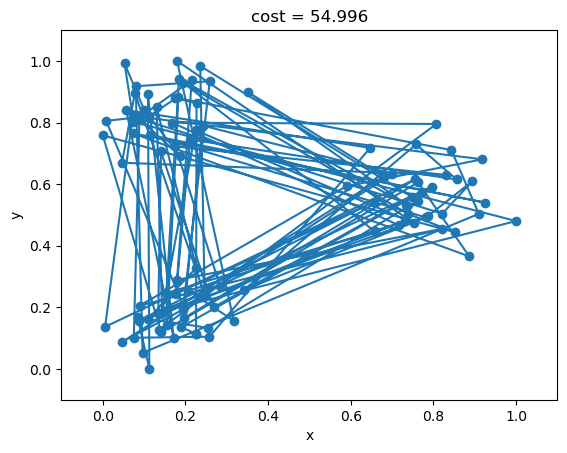

In [3]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set the x and y axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')

x_data, y_data = read_points("example_tsp_out.txt")

num_orderings = 15
orderings = [np.arange(0, len(x_data)) for i in range(num_orderings)]
for i in range(num_orderings):
    np.random.shuffle(orderings[i])

# Create an empty line object
line, = ax.plot(x_data, y_data, marker="o")
# Adjust the x and y limits
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Define the update function
def update(frame):

    order = orderings[frame]
    new_x, new_y = x_data[order], y_data[order]
    new_x = np.append(new_x, new_x[0])
    new_y = np.append(new_y, new_y[0])
    # Update the line data
    line.set_data(new_x, new_y)
    
    cost = path_dist(list(zip(new_x, new_y)))
    
    ax.set_title(f"cost = {round(cost, 3)}")

    return line,

# Create the animation object
ani = FuncAnimation(fig, update, frames=np.arange(0, num_orderings, 1), interval=5, blit=True)

ani.save('animation.gif', writer='imagemagick', fps=1, dpi=100)

# Display the animation in the notebook
html = HTML(ani.to_jshtml())

In [4]:
html